# 1. Getting Started with SiReNetA and Overview

Authors: **Gorka Zamora-López** and **Matthieu Gilson**

---------------------

This notebook is part of an introductory tutorial for the use of *Stimulus-Response Network Analysis* ([SiReNetA](https://github.com/mb-BCA/SiReNetA)) to study the structure of complex networks:
1. **[Getting Started and Overview](1_GettingStarted.ipynb)**
2. *[Calculating Response to Stimulus and Metrics](2_Basics_StimRespMetrics.ipynb)*
3. *[Canonical Models](3_Basics_CanonModels.ipynb)*
4. *[Comparing Networks](4_UseCase_CompareNets.ipynb)*
5. *[Network Distance](5_UseCase_NetDist.ipynb)*
6. *[Weighted Networks](6_Basics_WeightedNets.ipynb)* 

---------------------

### Outline
* Installation of the *SiReNetA* library.
* Familiarization with the library and getting information.
* A first example into Stimulus-Response Network Analysis.

---------------------

## 1.1. Installing *SiReNetA* and dependencies

*SiReNetA* is built upon the array object definition of [NumPy](https://numpy.org) and it uses functions from the [SciPy](https://scipy.org) library. Running these tutorials also requires [Matplotlib](https://matplotlib.org) for plotting and visualization purposes. The installation of *SiReNetA* checks for these libraries and installs them if not available, see the file 'requirements.txt' [here](https://github.com/mb-BCA/SiReNetA/blob/master/requirements.txt).

Some notebooks also require the library [GAlib](https://github.com/gorkazl/pyGAlib) for graph generation, manipulation and analysis in the context of classic graph theory.

The following cell checks whether *SiReNetA* is already installed (in the same Python environment in which this notebook is running) and otherwise, the library will be installed using [pip](https://pypi.org/project/pip/). 

>**Note**: the exclamation mark ( ! ) before `pip install ...` indicates the Jupyter notebook to run the line of code as a system command, same as if we would run it from a terminal window.

In [1]:
# Check SiReNetA is installed in the current Python environment, otherwise install (NOTE that you can also create a dedicated python environment to install SiReNetA)
try:
    import sireneta
except ImportError:
    # Install from the GitHub repository
    print('Installing SiReNetA from GitHub ...')
    #! pip install git+https://github.com/mb-BCA/SiReNetA.git@master
    ! pip install git+https://github.com/mb-BCA/SiReNetA.git@v1_dev

# Make sure the library is properly installed by importing it
import sireneta as sna
print( 'SiReNetA:', sna.__version__ )

SiReNetA: 0.1.dev2


<br>

## 1.2. Getting familiarised with the *SiReNetA* library

Information about the library, its modules and functions is obtained 'online' as usual in the IPython and Jupyter environments. Type `help(module_name)` or `module_name?` in a cell of the notebook (or in an interactive window) to access the corresponding docstrings.

Run the following cell to see the general overview of *SiReNetA*.

In [2]:
# See the general description of sireneta library 
sna?

Type:        module
String form: <module 'sireneta' from '/home/INT/gilson.m/.conda/envs/compneuro/lib/python3.11/site-packages/sireneta/__init__.py'>
File:        ~/.conda/envs/compneuro/lib/python3.11/site-packages/sireneta/__init__.py
Docstring:  
Response Network Analysis (SiReNetA)

A library to study complex networks in the light of canonical propagation models.

*SiReNetA* proposes a generalised course of action to derive network metrics and
characterise networks from the viewpoint of dynamical systems, valid for
different canonical propagation models. Since *SiReNetA* introduces a model-based
approach to network analysis, it consists on four fundamental steps:

1. Identify the constraints and basic assumptions about the real system studied.
2. Select accordingly an adequate propagation model.
3. Compute the response tensor *R(t)* evaluating the interactions between nodes.
4. Extract information of the network applying a variety of metrics on *R(t)*.

**Reference and Citation**


As shown, the library is organised into four user modules:

- responses.py
- metrics.py
- simulate.py
- tools.py

Run the following cell (uncommenting lines one-by-one) to see the description and a list of functions accessible in each module.

In [3]:
## Explore the help functions of SiReNetA

sna.responses?
#sna.metrics?
#sna.simulate?
#sna.tools?

Type:        module
String form: <module 'sireneta.responses' from '/home/INT/gilson.m/.conda/envs/compneuro/lib/python3.11/site-packages/sireneta/responses.py'>
File:        ~/.conda/envs/compneuro/lib/python3.11/site-packages/sireneta/responses.py
Docstring:  
Calculation of pair-wise, temporal responses for different propagation models

This module contains functions to calculate the temporal evolution of the
pair-wise reponses $R_{ij}(t)$ between nodes, due to initial stimuli.
The location and intensity of the perturbations can be defined by the users.
Default are set to all nodes receive stimulus of unit amplitude. Results for
$R_{ij}(t)$ are returned as a numpy array of rank-3 of shape (nt,N,N) where nt
is the number of time points and N the number of nodes.

Calculation of Jacobian matrices
--------------------------------
TransitionMatrix
    Returns the transition probability matrix for random walks.
JacobianMOU
    Calculates the Jacobian matrix for the MOU dynamic system.
La

Finally, check the description of individual functions, the expected parameters and their outputs. For example:

In [4]:
sna.responses.TransitionMatrix?
#sna.responses.Resp_DiscreteCascade?
#sna.responses.Resp_LeakyCascade?
#sna.metrics.GlobalResponse?
#sna.metrics.TimeToPeak?
#sna.simulate.Sim_RandomWalk?


Signature: sna.responses.TransitionMatrix(con, rwcase='simple')
Docstring:
Returns the transition probability matrix for random walks.

TODO: ADD RANDOM WALK WITH TELEPORTATION

- If rwcase='simple'
Given a connectivity matrix A, where Aij represents the (weighted)
connection from i to j, the transition probability matrix for a simple
random walk is computed as Tij = Aij / deg(i), where deg(i) is the output
(weighted) degree of node i.

Parameters
----------
con : ndarray (2d) of shape (N,N).
    The connectivity matrix of the network.
rwcase : string, optional
    Default 'simple' returns the transition probability matrix for the
    simple random walk.

Returns
-------
tp_matrix : ndarray of rank-2 and shape (N,N).
    The transition probability matrix.

NOTE
----
For now only the simple random walk is supported. Optional parameter
available to cover different classes of random walks in future
releases.
File:      ~/.conda/envs/compneuro/lib/python3.11/site-packages/sireneta/response

<br>

## 1.3. A first example of Stimulus-Response Network Analysis (SRNA)

The core idea behind *SRNA* is to reveal the properties of networks by probing how they respond to localised perturbations. That is, to apply a stimulus of unit amplitude at one node and then observe how the rest of nodes respond over time. The manner in which the stimulus propagates throughout the network depends both on the structure of the network and the dynamical propagation model. Under *SRNA* network structure and dynamics are studied jointly. A typical analysis consists of **four steps**:

1. Identify the key dynamical constraints of the real system investigated.
2. Choose a canonical propagation propagation model.
3. Compute the pair-wise network responses $\mathcal{R}_{ij}(t)$ of the network.
4. Extract spatio-temporal network metrics out of $\mathcal{R}_{ij}(t)$.


Suppose we wanted to study the example "brain connectivity" below that can be reduced into a graph of *N = 8* nodes.


<img alt="Sample Graph, n=8 nodes" src="img/TestNet_N8_Brain.jpg" width="480">


### Step 1 …

... consists of identifying minimal dynamical conditions and properties of propagation in the real system. In this example, the brain at the macroscopic level is considered as a **_dissipative system_** in which **_continuous signals_**  broadcasted by a region travel to all the connected neighbours (cascading fashion). Importantly, due to the dissipative nature of the propagation, these signals fade over time, but do not constantly reverberate.

<img alt="XXX SHOW FIG ABOUT E.G. TMS" src = "xxx.jpg" width=480>

### Step 2 …

... is about finding a suitable canonical propagation model that fulfils these conditions. Here we consider the *leaky-cascade*:

$$\dot{\mathbf{x}}(t) = - \frac{1}{\tau} \mathbf{x}(t) \,+\, A \, \mathbf{x}(t) $$

where $\mathbf{x}(t)$ is are the *N* signals and $\tau$ is a leakage time-constant controlling for the dissipation rate. See [Canonical Models](3_Basics_CanonModels.ipynb) for the details of the propagation model and comparison with others.

### Step 3 …

… is the computation if the temporal evolution of the pair-wise, conditional response matrices over time $\mathcal{R}(t)$. In particular, each element $\mathcal{R}_{ij}(t)$ is a curve representing the transient response of node *i* to a stimulus of unit amplitude applied at node *j* at time *t = 0*, as illustrated below.

<img alt="Sample Graph, n=8 nodes" src="img/TestNet_N8_StimResp.jpg" width="480">

For that, we first need to load the necessary libraries and enter the conditions for the "simulation".

In [5]:
# Python standard & third-party library imports
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Some plotting options to control visualization
%matplotlib inline
# Define the default scale for the plots
plt.rcParams['figure.dpi'] = 72
plt.rcParams['text.usetex'] = True

We consider the network determined by the following binary matrix.

In [7]:
# Load the sample graph to study
net = np.loadtxt('../Data/Testnet_N8.txt', dtype=int)
# Number of nodes
N = len(net)

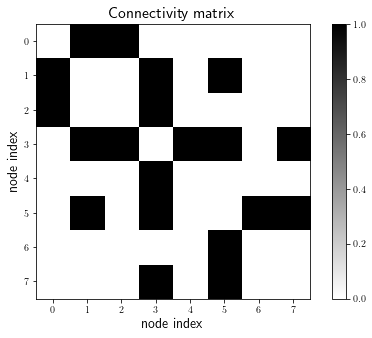

In [8]:
# Visualize the connectivity matrix
plt.figure()
plt.title('Connectivity matrix', fontsize=16)
plt.imshow(net, cmap='gray_r')
plt.clim(0,net.max())
plt.colorbar()
plt.xlabel('node index', fontsize=14)
plt.ylabel('node index', fontsize=14)

plt.tight_layout()

Convergence of the leaky-cascade model depends on the leakage time-constant, when $\tau \leq 1 \,/\, \lambda_{max}$. Find the largest eigenvalue of connectivity *A* and the critical $\tau_{max}$.

In [9]:
# Find the largest eigenvalue of the connectivity matrix A
evs = np.linalg.eigvals(net)
evmax = evs.real.max()
# Calculate the largest possible tau
taumax = 1.0 / evmax

print( f'Spectral radius:\t{evmax:2.5f}' )
print( f'Largest possible tau:\t{taumax:2.5f}' )

Spectral radius:	3.03407
Largest possible tau:	0.32959


Prepare to compute the response matrices $\mathcal{R}(t)$.

In [10]:
# Define the simulation parameters
# Set the temporal resolution
tfinal = 10
dt = 0.01
tpoints = np.arange(0.0, tfinal+dt, dt)
nsteps = len(tpoints)

# Set the leakage time-constants τ, proportional to taumax
tau = 0.8 * taumax

# Define the stimulation amplitude to every node
stim = 1.0

In [11]:
# Calculate temporal evolution of the pair-wise responses R(t)
print( f'\nCalculating ... pair-wise response tensors, from t=0 to t={tfinal:3.1f}, with step={dt:3.3f} ...' )
time1 = timer()
Rmats = sna.Resp_LeakyCascade(net.T, S0=stim, tau=tau, tmax=tfinal, timestep=dt)
time2 = timer()
print( f'Computation time: {time2-time1:1.3f} seconds' )


Calculating ... pair-wise response tensors, from t=0 to t=10.0, with step=0.010 ...
Computation time: 0.060 seconds


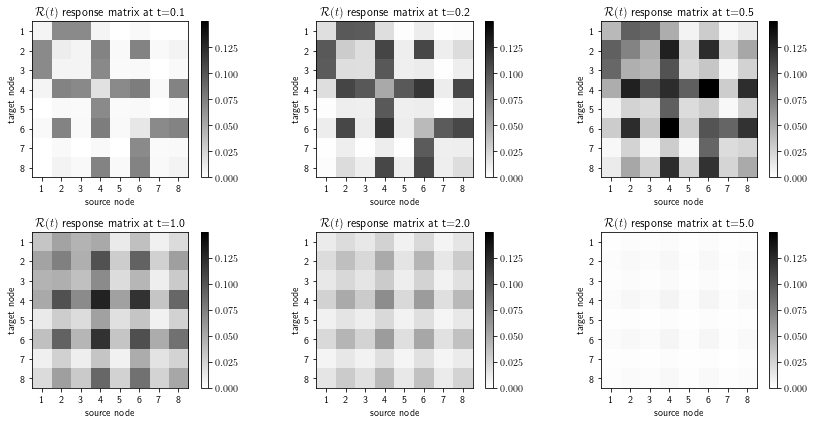

In [12]:
# Visualise the pair-wise response matrices at times t = 0.1, 0.3, 0.5, 1.0, 2.0, 3.0
maxresp = Rmats.max()

tidxlist = [10,20,50,100,200,500]
plt.figure(figsize=[12,6])
for i, tidx in enumerate(tidxlist):
    t = tpoints[tidx]
    plt.subplot(2,3,i+1)
    plt.title( f'$\mathcal{{R}}(t)$ response matrix at t={t:1.1f}' )
    plt.imshow(Rmats[tidx], cmap='gray_r')
    plt.clim(0,maxresp)
    plt.colorbar()
    plt.xticks(np.arange(N), np.arange(N)+1)
    plt.yticks(np.arange(N), np.arange(N)+1)
    plt.xlabel('source node')
    plt.ylabel('target node')

plt.tight_layout()

The above matrices are the pair-wise (source/target) responses for all pairs of nodes, at different times. Therefore, each pair forms a curve over time. We now visualize these for the responses $\mathcal{R}_{i1}(t)$ of nodes *i = 2, 3, ...,8* to the stimulus initially applied at *j = 1*.

For comparison, the gray dashed curve represents the global network response (rescaled by the number of weights for comparison), to illustrate how the specific responses differ from the global one.

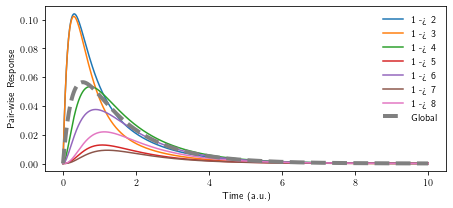

In [13]:
# Compute the global network response
Rglob = sna.GlobalResponse(Rmats)

# Plot the responses to stimulus applied at j = 1.
plt.figure(figsize=(6.4,3))
for i in range(1,N):
    plt.plot(tpoints, Rmats[:,i,0], label='1 -> %d' %(i+1))
plt.plot(tpoints, Rglob / N**2, label='Global', c='gray', ls='--', lw=4)
plt.xlabel('Time (a.u.)')
plt.ylabel('Pair-wise Response')
plt.legend(frameon=False)

plt.tight_layout()

As observed, the largest (*and fastest* !) responses correspond to *i = 2, 3* which are directly connected to *j = 1*, followed by *4* and *6* which are the nodes with more connections in the network.

### Step 4 …

… is finally to _**extract network metrics out of**_ $\mathcal{R}\_{ij}(t)$, in the form of spatio-temporal properties of the response propagation. There are many such metrics that could be derived. Here we only estimate two for illustration (see [Calculating Response to Stimulus and Metrics](2_Basics_StimRespMetrics.ipynb) for further metrics):


- Time-to-peak distance $D^{ttp}_{ij}$, which analogous to the graph distance, and …
- the total node responses, $\bar{r}_i$, which is reminiscent of the degree or centrality of a node.



The pair-wise responses $\mathcal{R}_{i \gets 1}(t)$ plotted above showed that every pair-wise interaction peaks at different times $t^*_{i1}$. This pair-wise time-to-peak can be employed to redefine the distance between nodes in a network ($D^{ttp}_{ij} = t^*_{ij}$) and thus  generalize the usual path distance in graphs. See [Network Distance](5_UseCase_NetDist.ipynb) and [Zamora-López & Gilson, Chaos (2024)](https://doi.org/10.1063/5.0202241) for further details.

In the following we compute and visualize this distance matrix:

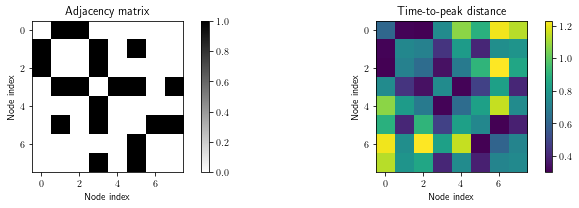

In [14]:
# Compute the time-to-peak distance 
ttpdist = sna.Time2Peak(Rmats, timestep=dt)

plt.figure(figsize=(10,3))
# Plot the adjacency matrix
plt.subplot(1,2,1)
plt.title('Adjacency matrix')
plt.imshow(net, cmap='gray_r')
plt.colorbar()
plt.xlabel( 'Node index' )
plt.ylabel( 'Node index' )

# Plot the time-2-peak distance matrix
plt.subplot(1,2,2)
plt.title('Time-to-peak distance')
plt.imshow(ttpdist)
plt.colorbar()
plt.xlabel( 'Node index' )
plt.ylabel( 'Node index' )

plt.tight_layout()

As expected from the $\mathcal{R}_{i \gets 1}(t)$ curves above, the nodes that are directly connected peak earlier to the stimuli and are thus "closer".

Finally, we compute the total node responses $\bar{r}_i$. For that, we first compute the (summed) response $r_i(t)$ of *i* to the stimuli in all other *j*. Then $\bar{r}_i$ is the accumulated response of *i* over time (integral or area-under-the-curve of $r_i(t)$).

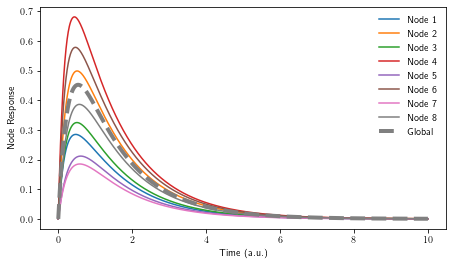

In [15]:
# Compute and visualise the node responses
r_nodes = sna.NodeResponses(Rmats)[0]

# Visualize the node responses over time
plt.figure(figsize=(6.4,3.8))
for i in range(N):
    plt.plot(tpoints, r_nodes[:,i], label='Node %d' %(i+1))
plt.plot(tpoints, Rglob / N, label='Global', c='gray', ls='--', lw=4)
plt.xlabel('Time (a.u.)')
plt.ylabel('Node Response')
plt.legend(frameon=False)

plt.tight_layout()

Nodes *i = 4* and *6* are those with largest responses, since they are the most connected. On the contrary, *i = 5* and *7* have only one connection and thus display the smallest responses.

We now reduce this into one value per node, the total node response $\bar{r}_i$ and compare to their degrees $k_i$.

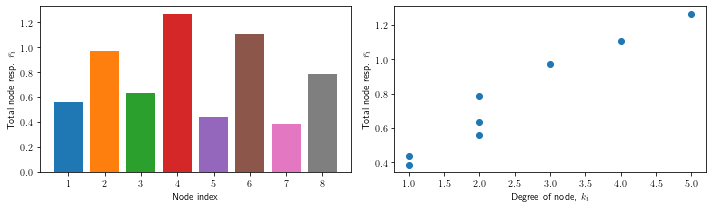

In [16]:
# Compute the total node responses
totr_nodes = sna.AreaUnderCurve(r_nodes, dt)

# Visualize the total node responses
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
for i in range(N):
    plt.bar((i+1), totr_nodes[i])
plt.xlabel( 'Node index' )
plt.ylabel( 'Total node resp.  $\\bar{r}_i$' );

# Visualize their relation with the degree
deg = net.sum(axis=0)

plt.subplot(1,2,2)
plt.scatter(deg, totr_nodes)
plt.xlabel('Degree of node, $k_i$')
plt.ylabel( 'Total node resp.  $\\bar{r}_i$' )

plt.tight_layout()

Last, we can explore _**the relation between the centrality of a node and their total response**_. 

In classical graph theory, the degree of a node is a first-order measure of centrality. The  closeness centrality $c_i$ is defined as the sum of (geodesic) distances from node *i* to the others: $c_i = \sum_{k=1}^N D_{ik}$. Both degree and closeness centrality are typically related via a negative correlation: the more connected a node (like a hub), the closer it is on average to other nodes via network paths.

Analogously, closeness centrality can be defined from the time-to-peak distance matrix as $c_i = \sum_{k=1}^N  D^{ttp}_{ik}$. Below, we compare this closeness centrality with the degree and the total node responses.

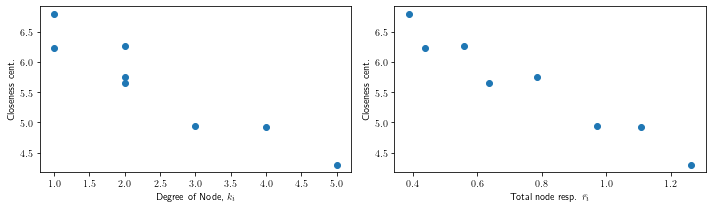

In [17]:
# Compute closeness centrality from time-to-peak distances
c_nodes = ttpdist.sum(axis=1)

plt.figure(figsize=(10,3))
# Compare centrality with degree
plt.subplot(1,2,1)
plt.scatter(deg,c_nodes)
plt.xlabel('Degree of Node, $k_i$')
plt.ylabel( 'Closeness cent.')

# Compare centrality with total node responses
plt.subplot(1,2,2)
plt.scatter(totr_nodes,c_nodes)
plt.xlabel( 'Total node resp.  $\\bar{r}_i$' )
plt.ylabel( 'Closeness cent.')

plt.tight_layout()

We see the expected negative correlations in both figures, the second one following because the degree and the total response are positively correlated. This shows that, for this example small network, nodes that have high degree (a local property) are also those "important" for the centrality (a global property that takes the whole network into account).

Note that the claimed correspondance between geodesic distance and time-to-peak is valid **because the considered network is undirected**. However, the dynamical measures here proposed are also straight-forwardly applicable to weighted and directed networks, unlike many graph metrics: for instance, a weight could correspond to a cost (like with the geodesic distance) or an efficacy to propagate the signal. Care must thus be taken when applying and interpreting spatio-temporal measures applied to a particular network. See [Weighted Networks](6_Basics_WeightedNets.ipynb) for examples of the applications to directed and weighted cases.